<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


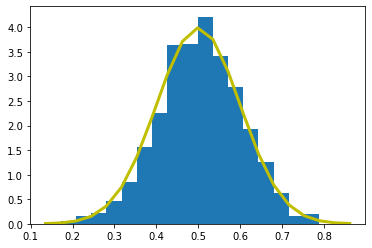

In [3]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0.5, 0.1
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True) # density is used in matplotlib 3.1 v and ahead
# if using matplotlib v2.1 use normed instead of density

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

Plot the histogram for the column `ConvertedComp`.


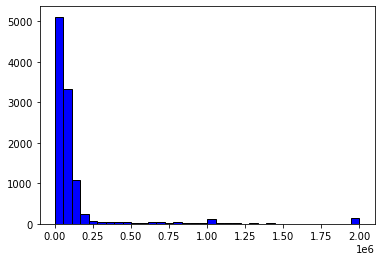

In [4]:
# your code goes here
# matplotlib histogram
plt.hist(df['ConvertedComp'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
len(df[df['Gender']=="Man"])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df['ConvertedComp'][df['Gender']=="Woman"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->

In [8]:
# your code goes here
print('Minimum Age:', df['Age'].min())
print('1st quarter/percentile Age:', df['Age'].quantile([0.25]))
print('Median Age:', df['Age'].median())
print('3rd quarter/percentile Age:', df['Age'].quantile([0.75]))
print('Maximum Age:', df['Age'].max())

Minimum Age: 16.0
1st quarter/percentile Age: 0.25    25.0
Name: Age, dtype: float64
Median Age: 29.0
3rd quarter/percentile Age: 0.75    35.0
Name: Age, dtype: float64
Maximum Age: 99.0


Plot a histogram of the column `Age`.


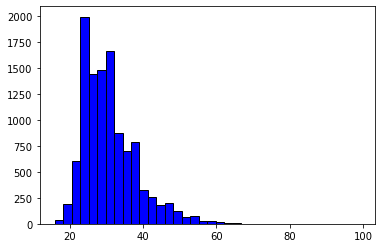

In [9]:
# your code goes here

# matplotlib histogram
plt.hist(df['Age'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


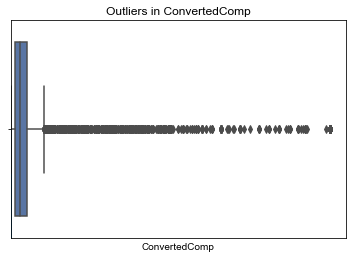

In [10]:
# your code goes here
df['ConvertedComp'].plot.box(title='Outliers in ConvertedComp');

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# find q1 and q3 values
q3, q1 = np.percentile(df['ConvertedComp'], [75, 25])
# compute IRQ
iqr = q3 - q1
print(q1)

nan


Find out the upper and lower bounds.


In [19]:
# your code goes here
print('The upper bounds:', df['ConvertedComp'].max())
print('The lower bounds:', df['ConvertedComp'].min())

The upper bounds: 2000000.0
The lower bounds: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR
print('Outliers below:',df['ConvertedComp'].lt(q1 - 1.5*iqr).sum())
print('Outliers above:',df['ConvertedComp'].gt(q3 + 1.5*iqr).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(q3 + 1.5*iqr)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(q3 + 1.5*iqr)]['ConvertedComp'].mean())

Outliers below: 0
Outliers above: 0
Outliers below: 0
Median with outliers: 57745.0
Median with outliers removed: nan
Mean with outliers removed: nan


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
print(df.shape)
print(df['ConvertedComp'].gt(q3 + 1.5*iqr).shape)
df1 = df[df['ConvertedComp'].le(q3 + 1.5*iqr)]
print('total number in new dataset:',df1.shape[0])
df2 = df[df['ConvertedComp'].gt(q3 + 1.5*iqr)]
print('total number of outliers removed:',df2.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))

(11398, 85)
(11398,)
total number in new dataset: 0
total number of outliers removed: 0
total number of nulls removed: 816
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
